## Online Shoppers Purchasing Intention
Ayesha Ali

## Importing Modules

In [1]:
! pip install yellowbrick


You should consider upgrading via the 'c:\anaconda\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import itertools
import numpy as np
import scipy.stats as ss
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,roc_auc_score, roc_curve, auc, precision_recall_curve
import eli5
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, auc
from sklearn.decomposition import PCA


In [3]:

plt.style.use('ggplot')
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

In [6]:
df = pd.read_csv(r"/Users/admin/Desktop/courses/dsc 478/project/online_shoppers_intention.csv")

# First 5 and last 5 rows
df.head(5).append(df.tail(5))


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [7]:
df.shape


(12330, 18)

In [8]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [10]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

> No null values

In [11]:
# Checking for duplicate rows
df[df.duplicated()]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


> So we do have some duplicate rows i.e 125 rows. We need to drop the redundant information. No point in keeping same inforation twice.

In [12]:
# Dropping duplicates
df.drop_duplicates(inplace = True)

In [13]:
# Shape after removing duplicate rows
df.shape

(12205, 18)

In [14]:
# This function would give  counts for each of the labels, have to pass the dataframe, column name, inclination horizontanl or vertical
def univariate_valueplot(data, col, inclination, figsize, color):
    fig, ax = plt.subplots(figsize=(figsize))

    if inclination == "horizontal":
        
        data[col].value_counts().plot(kind = "barh",color = color,  ax = ax);
        plt.title(f"{col} Vs Frequency"); 
        plt.xlabel("Frequencies");
        plt.ylabel("Labels");
        plt.show()
        print(f'Feature "{col}" has highest frequency for the class: {data[col].value_counts().index.values[0]}')
        print(f'Feature "{col}" has lowest frequency for the class: {data[col].value_counts().index.values[-1]}')

    else:
        data[col].value_counts().plot(kind = "bar",color = color, ax = ax);
        plt.title(f"{col} Vs Frequency"); 
        plt.ylabel("Frequencies");
        plt.xlabel("Labels");
        plt.show()
        print(f'Feature "{col}" has highest frequency for the class: {data[col].value_counts().index.values[0]}')
        print(f'Feature "{col}" has lowest frequency for the class: {data[col].value_counts().index.values[-1]}')

# This function can change inclination, figure size anything by just passing the parameter values
# This helps visualizes a pivot table
def bivariate_pivot_plot(data, cols,agg_col, inclination, figsize, color):
    fig, ax = plt.subplots(figsize=(figsize))

    if inclination == "horizontal":
        
        data.groupby(cols).agg({agg_col: "count"}).plot(kind = "bar", ax = ax,color = color );
        plt.title(f"{cols} Vs Frequency"); 
        plt.xlabel("Frequencies");
        plt.ylabel("Labels");
        plt.show()
   
      
    else:
        data.groupby([cols]).agg({agg_col: "count"}).plot(kind = "bar", ax = ax, color = color);
        plt.title(f"{cols} Vs Frequency"); 
        plt.ylabel("Frequencies");
        plt.xlabel("Labels");
        plt.show()

# This function checks for class imbalance
def checks_imbalance(df, y_col):
    df[y_col].value_counts().plot(kind = 'bar')
    plt.title("Class distribution");
    plt.xlabel("Classes");
    plt.ylabel("Number of datapoints");
    plt.show()
    
    if df[y_col].value_counts()[0] > df[y_col].value_counts()[1]:
        print("Class imbalance exists.", end = ' ')
        print("Class", df[y_col].value_counts().index[0], "has more number of data-points. Total datapoints: ", df[y_col].value_counts()[0])
        return True
    
    elif df[y_col].value_counts()[0] == df[y_col].value_counts()[1]:
        print("No class imbalance exists.")
        return False

    
    else:
        print("Class imbalance exists.", end = ' ')
        print("Class", df[y_col].value_counts().index[1], "has more number of data-points. Total datapoints: ", df[y_col].value_counts()[1])
        return True
    
# Uses chi square test to find if 2 categorical features are correlated or not
# Then plots it as a heatmap
def cramers_corrected_stat_for_heatmap(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


# This function takes in an unfitted model, trains it and then gives out the results for classification on certain metrices
# parameter decision_tree keep it as false if you are not using decision tree else it would throw an error
# This would also plot roc-auc curve and precision recall curve
# Finally it would return feature importance
def create_model(clf, X_train,X_test, y_train, y_test, decision_tree = False ):
        
    # fit the model
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculating Roc score
    roc_train = (roc_auc_score(y_train, clf.predict_proba(X_train.values)[:, 1]))    
    roc_test = (roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))    

    # Calculating fscore, precision & recall 
    f1_train = (f1_score(y_train, y_train_pred))
    f1_test = (f1_score(y_test, y_test_pred))

    precision_train = (precision_score(y_train, y_train_pred))
    precision_test=(precision_score(y_test, y_test_pred))
    
    accuracy_score

    acc_train = (accuracy_score(y_train, y_train_pred))
    acc_test=(accuracy_score(y_test, y_test_pred))
    
    recall_train = (recall_score(y_train, y_train_pred))        
    recall_test= (recall_score(y_test, y_test_pred))
    print()
    print()
    print(" F score on train set is:", f1_train )
    print(" F score on test set is:", f1_test )
    print()
    print(" Precision on train set is:", precision_train)
    print(" Precision on test set is:", precision_test)
    print()
    print(" Recall on train set is:",  recall_train)
    print(" Recall on test set is:",  recall_test)
    print()
    print(' Train ROC is:',roc_train) 
    print(' Test ROC is:', roc_test )
    print()
    print(' Train accuracy is:',acc_train) 
    print(' Test accuracy is:', acc_test )
    print()
   
    print(" Train Classification report")
    print(classification_report(y_train, y_train_pred))
    print()
    print(" Test Classification report")
    print(classification_report(y_test, y_test_pred))

    
    # displaying confusion matrix
    print("Confusion Matrix on test data: ")
    conf = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(conf, annot=True, fmt='g'); 
    # labels, title and ticks
    plt.xlabel('Predicted labels');
    plt.ylabel('True labels'); 
    plt.title('Confusion Matrix'); 
    plt.show()


 
    # plot no skill roc curve
    plt.plot([0, 1], [0, 1], linestyle='--', label='Dummy Model')
    # calculate roc curve for model
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    # plot model roc curve
    plt.plot(fpr, tpr, marker='.', label=str(clf).split("(")[0] + ' AUC = %0.2f' % roc_auc)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()      
    
    no_skill = len(y_test[y_test==1]) / len(y_test)
    # plot the no skill precision-recall curve
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill(Dumb Model)')
    # calculate model precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
    # plot the model precision-recall curve
    auc_pr = auc(recall, precision)
    plt.plot(recall, precision, marker='.', label=str(clf).split("(")[0]+ ' AUC P-R Curve = %0.2f' % auc_pr)
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
    if decision_tree:
        fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (50,40))

        tree.plot_tree(clf, fontsize=20, 
                       feature_names = X_train.columns, 
                       class_names = list(map(str, list(y.unique()))),
                       filled = True, max_depth = 5);
        plt.show()

    print("Feature Interpretation: ")
    
    return clf, eli5.show_weights(clf, feature_names= list(X_train.columns), top = 100), (acc_train, acc_test)

# This is for tuning the hyperparameters of the model
# NEED to pass in the model, a parameter grid with vales and the scoring metric on whatever to optimze it
# This would return the optimzed model
def grid_search(model,X_train,X_test, y_train, y_test, parameter_grid, scoring):
    grid_clf = GridSearchCV(model, param_grid = parameter_grid, scoring = scoring, verbose = 1)
    grid_clf.fit(X_train, y_train)
    
    model_name = str(model).split("(")[0]
    print(f"Results from Grid Search: " )
    print()
    print(f"The best estimator across all searched params for {model_name}:\n", grid_clf.best_estimator_)
    print()
    print(f"The best {scoring} score across all searched params for {model_name}\n:", grid_clf.best_score_)
    print()
    print(f"The best parameters across all searched params for {model_name}:\n", grid_clf.best_params_)
    print()
    # Getting the best estimator
    optimized_model = grid_clf.best_estimator_    
    return optimized_model

# Plots the clusters so that you can visualize
def plot_the_clusters(kmeans_model, data, number_of_clusters):
    y_kmeans = kmeans_model.fit_predict(data)
    try:
        X_vals = data.values
    except:
        X_vals = data
    # if you are increasing clusters from more than 6, you will have to include more colors in the colors list or else it would throw an error
    colors = ['red', 'blue', 'green', 'cyan', 'orange', 'pink']

    plt.figure(figsize=(15, 12), dpi=80)

    for i in range(0, number_of_clusters):
        plt.scatter(X_vals[y_kmeans == i, 0], X_vals[y_kmeans == i, 1], s = 100, c = colors[i], label = 'Cluster ' +str(i))

    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
    plt.title('Clusters')
    plt.legend()
    plt.show()

## EDA

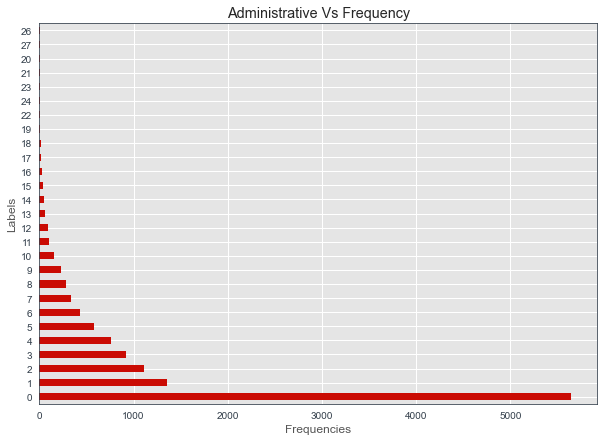

Feature "Administrative" has highest frequency for the class: 0
Feature "Administrative" has lowest frequency for the class: 26


In [15]:
univariate_valueplot(df, "Administrative", "horizontal", (10,7), "r")

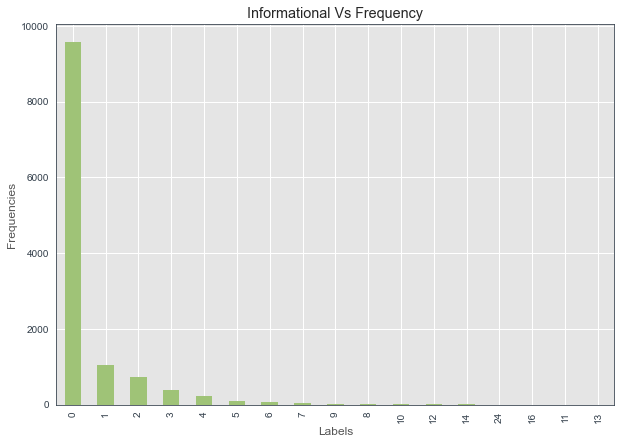

Feature "Informational" has highest frequency for the class: 0
Feature "Informational" has lowest frequency for the class: 13


In [16]:
univariate_valueplot(df, "Informational", "vertical", (10,7), "g")

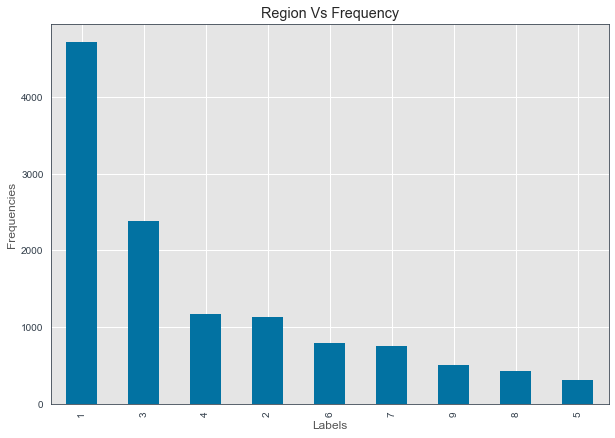

Feature "Region" has highest frequency for the class: 1
Feature "Region" has lowest frequency for the class: 5


In [17]:

univariate_valueplot(df, "Region", "vertical", (10,7), "b")

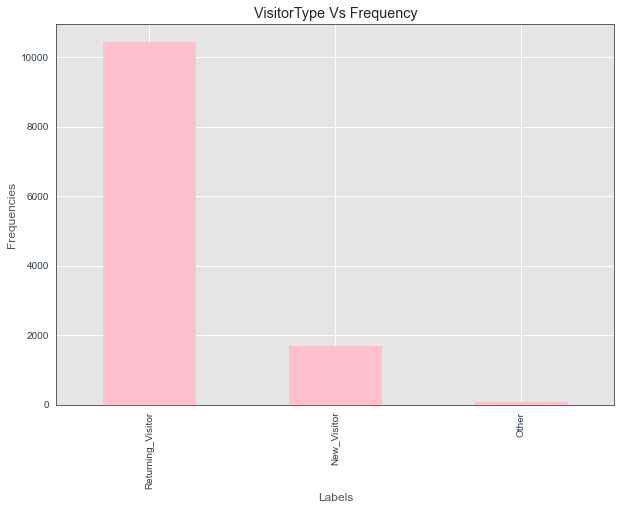

Feature "VisitorType" has highest frequency for the class: Returning_Visitor
Feature "VisitorType" has lowest frequency for the class: Other


In [18]:

univariate_valueplot(df, "VisitorType", "vertical", (10,7), "pink")

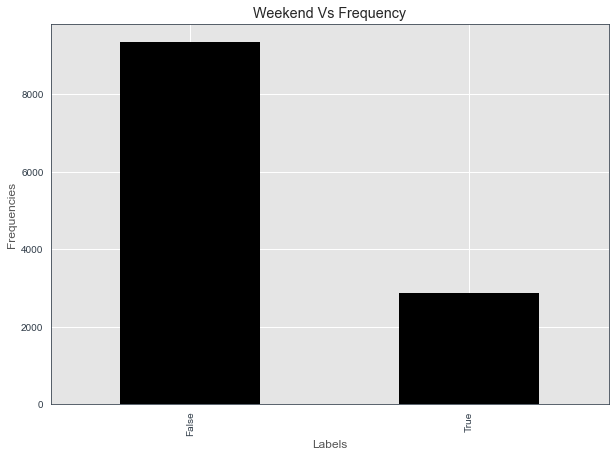

Feature "Weekend" has highest frequency for the class: False
Feature "Weekend" has lowest frequency for the class: True


In [19]:

univariate_valueplot(df, "Weekend", "vertical", (10,7), "black")

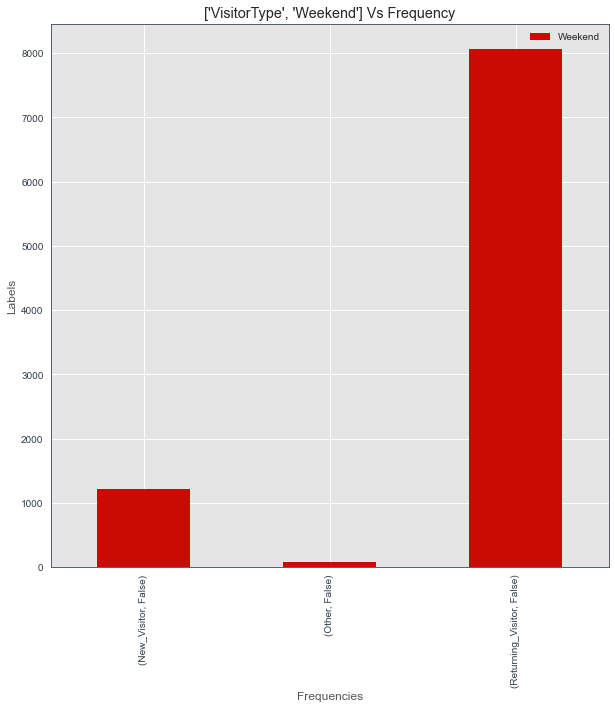

In [20]:
bivariate_pivot_plot(df[df["Weekend"] == False], ["VisitorType", "Weekend"] , "Weekend", "horizontal", (10,10), "r")

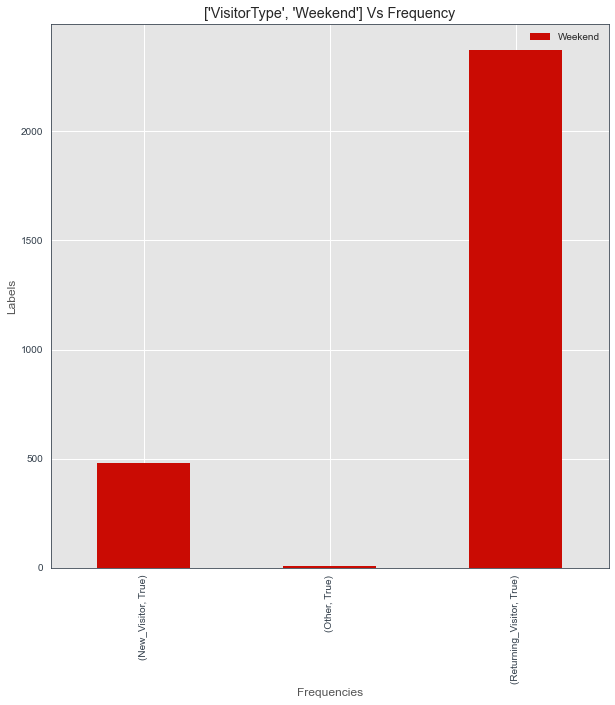

In [21]:

bivariate_pivot_plot(df[df["Weekend"] == True], ["VisitorType", "Weekend"] , "Weekend", "horizontal", (10,10), "r")

> Returning visitors dominate the ecommerce website

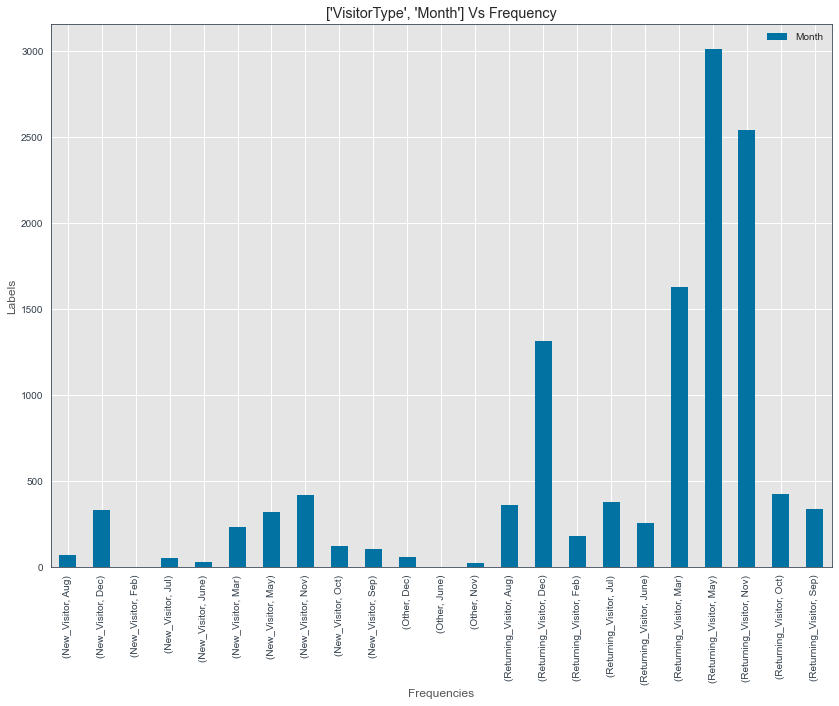

In [22]:
bivariate_pivot_plot(df, ["VisitorType", "Month"] , "Month", "horizontal", (14,10), "b")

> Returning Visitors are highest for the month of November.

> New Visitors are also highest for November.


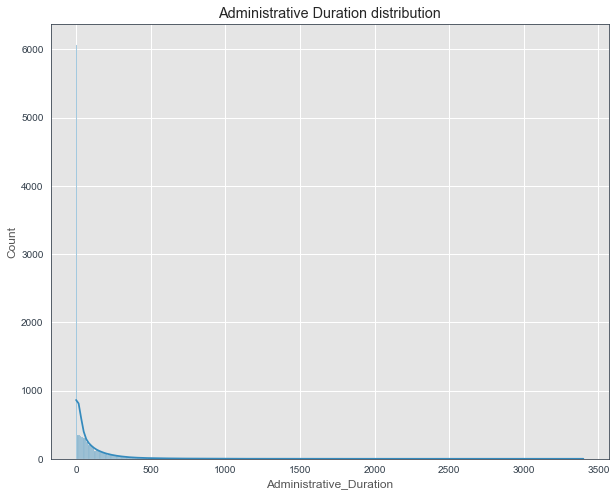

In [23]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(df["Administrative_Duration"], kde = True, ax = ax);
plt.title("Administrative Duration distribution");

> A right skew exists here.

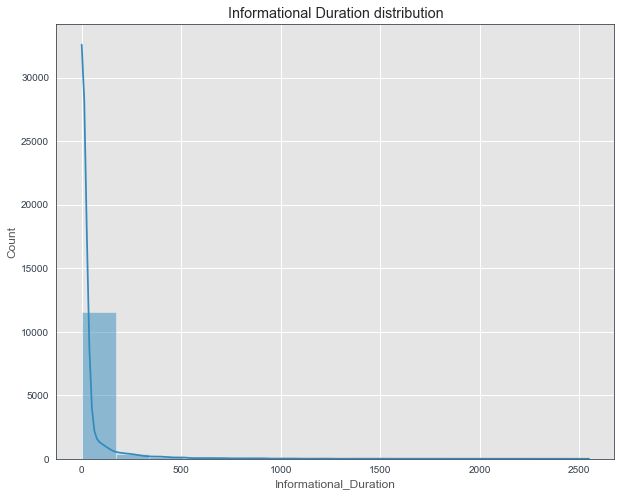

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(df["Informational_Duration"], kde = True, ax = ax);
plt.title("Informational Duration distribution");

> Again a good amount of right skew exists here.

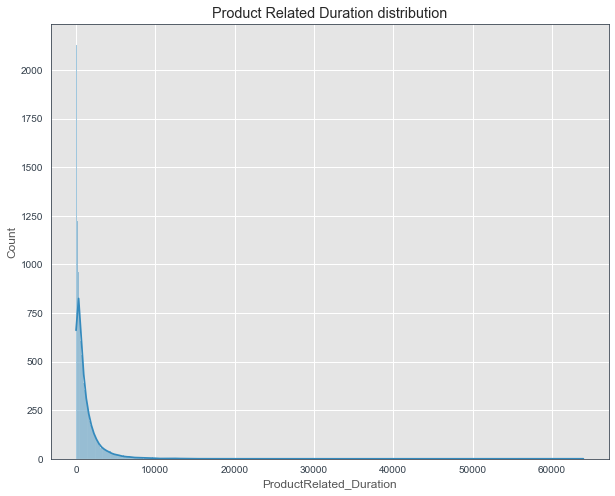

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(df["ProductRelated_Duration"], kde = True, ax = ax);
plt.title("Product Related Duration distribution");

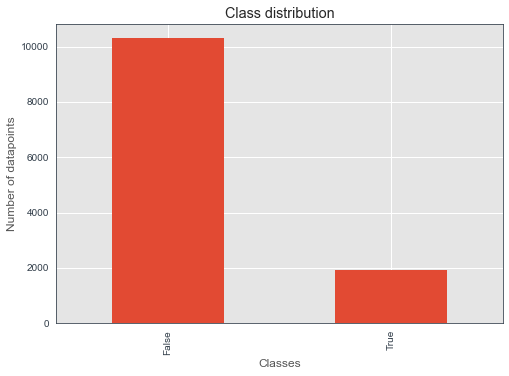

Class imbalance exists. Class False has more number of data-points. Total datapoints:  10297


True

In [26]:

checks_imbalance(df, "Revenue")


> 84.5% (10,422) were target attribute of False that did not end with purchasing, and the rest (1908) were target attribute True that ended with a purchase of a product
Class imbalance exists. We would have to perform class balancing here.

In [27]:
# Remaining categorical features can be encoded 
df["Revenue"] = df["Revenue"].map({True: 1, False : 0})
df["Weekend"] = df["Weekend"].map({True: 1, False : 0})

In [28]:
continuous = []

# I just devised this > than 50 rule as i knew before hand the unique values in the data
for col in df.columns:
    print(f"For column '{col}':  max is : {df[col].max()}, min is: {df[col].min()}, number of unique values: {df[col].nunique()}")
    print()
    if df[col].nunique() >50:
        continuous.append(col)

For column 'Administrative':  max is : 27, min is: 0, number of unique values: 27

For column 'Administrative_Duration':  max is : 3398.75, min is: 0.0, number of unique values: 3335

For column 'Informational':  max is : 24, min is: 0, number of unique values: 17

For column 'Informational_Duration':  max is : 2549.375, min is: 0.0, number of unique values: 1258

For column 'ProductRelated':  max is : 705, min is: 0, number of unique values: 311

For column 'ProductRelated_Duration':  max is : 63973.52223, min is: 0.0, number of unique values: 9551

For column 'BounceRates':  max is : 0.2, min is: 0.0, number of unique values: 1872

For column 'ExitRates':  max is : 0.2, min is: 0.0, number of unique values: 4777

For column 'PageValues':  max is : 361.7637419, min is: 0.0, number of unique values: 2704

For column 'SpecialDay':  max is : 1.0, min is: 0.0, number of unique values: 6

For column 'Month':  max is : Sep, min is: Aug, number of unique values: 10

For column 'OperatingSyst

In [29]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [30]:
# These are the columns which would need to be scaled, for these the range of values look on a higher side
df[['Administrative_Duration','Informational_Duration','ProductRelated','ProductRelated_Duration','PageValues']]

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues
0,0.0,0.0,1,0.000000,0.000000
1,0.0,0.0,2,64.000000,0.000000
2,0.0,0.0,1,0.000000,0.000000
3,0.0,0.0,2,2.666667,0.000000
4,0.0,0.0,10,627.500000,0.000000
...,...,...,...,...,...
12325,145.0,0.0,53,1783.791667,12.241717
12326,0.0,0.0,5,465.750000,0.000000
12327,0.0,0.0,6,184.250000,0.000000
12328,75.0,0.0,15,346.000000,0.000000


**Important**

>**Scaling everything after performing train-test split so as to avoid data leakage.**

> **Similar approach we would follow for performing balancing.**

## Checking for correlation

### Correlation For Continuous Columns

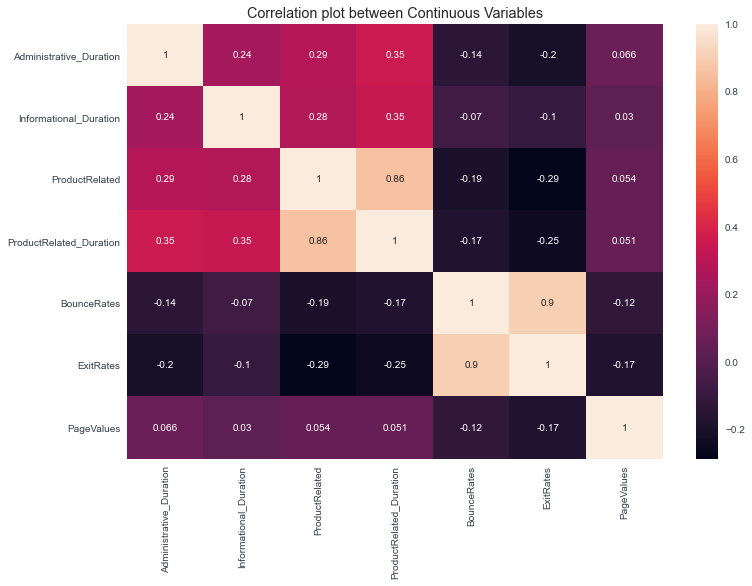

In [31]:
# Plots pearson correlation
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(df[continuous].corr(), annot=True, ax=ax); ax.set_title("Correlation plot between Continuous Variables");


Highest correlation is 0.9 (exit rates and bounce rates) and 0.86(productrelated_duration and productRelated)

### Correlation For Categorical Columns

In [32]:
# Doing one hot encoding for categorical data
data = pd.get_dummies(df)

In [33]:
# Splitting data into X and Y sets
y = data["Revenue"]
X = data[list(set(data.columns) - set(["Revenue"]))]


# Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2)

In [34]:
y_train.shape

(9764,)

In [35]:
y_test.shape

(2441,)

In [36]:
# resetting index, so that it does not throw error
X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [37]:
# Scaling the data, we need to fit and transform train data and just transfrom test data to avoid data leakage
label_enc = StandardScaler()

X_train_scaled_vals = label_enc.fit_transform(X_train[continuous].values)

X_train_scaled = pd.DataFrame(data = X_train_scaled_vals, columns = X_train[continuous].columns)

X_test_scaled_vals = label_enc.transform(X_test[continuous].values)
X_test_scaled = pd.DataFrame(data = X_test_scaled_vals, columns = X_test[continuous].columns)

X_train_cat = X_train[list(set(X_train.columns) - set(continuous))]
X_test_cat = X_test[list(set(X_train.columns) - set(continuous))]

In [38]:

categorical_cols = list(set(df.columns) - set(continuous))

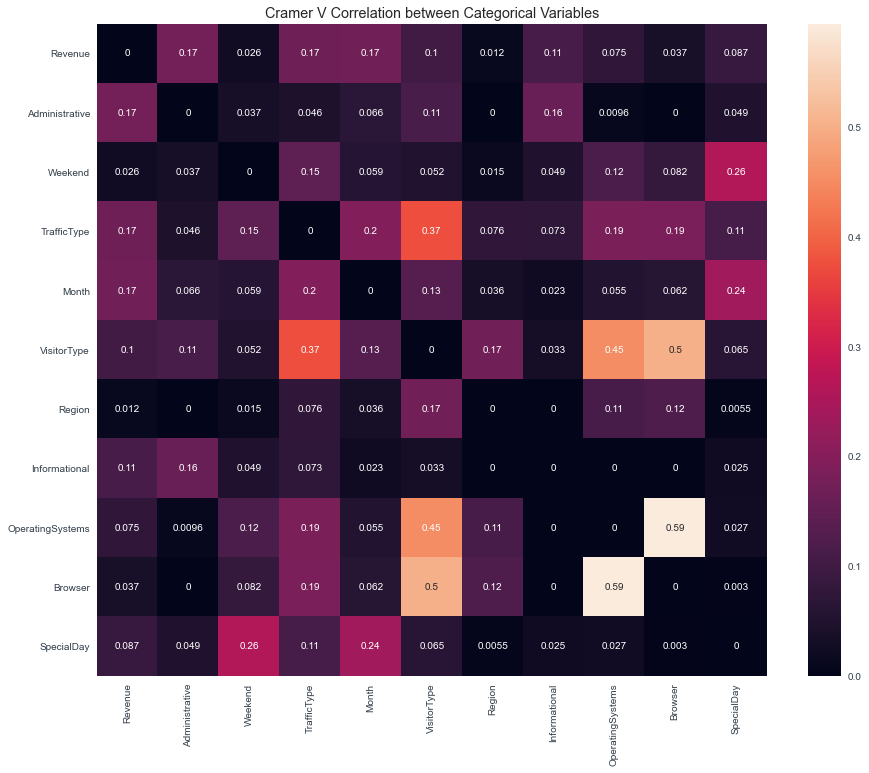

In [39]:

correlation_matrix = np.zeros((len(categorical_cols),len(categorical_cols)))

for column1, column2 in itertools.combinations(categorical_cols, 2):
    index1, index2 = categorical_cols.index(column1), categorical_cols.index(column2)
    correlation_matrix[index1, index2] = cramers_corrected_stat_for_heatmap(pd.crosstab(df[column1], df[column2]))
    correlation_matrix[index2, index1] = correlation_matrix[index1, index2]
    
corr = pd.DataFrame(correlation_matrix, index = categorical_cols, columns = categorical_cols)

fig, ax = plt.subplots(figsize=(15, 12))

ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Categorical Variables");


In [40]:
# Creating complete training and testing sets again as preprocessing is done now
X_train_final = pd.concat([X_train_scaled, X_train_cat], axis = 1)
X_test_final = pd.concat([X_test_scaled, X_test_cat], axis = 1)

## Balancing the data using SMOTE

In [41]:
print("Before balancing the data: ", Counter(y_train))

Before balancing the data:  Counter({0: 8223, 1: 1541})


In [42]:
# creating smotes object
rs = SMOTE()
# Applying smote to train data
X_train_smote, y_train_smote = rs.fit_resample(X_train_final, y_train)


In [43]:
print("After balancing the data: ", Counter(y_train_smote))

After balancing the data:  Counter({0: 8223, 1: 8223})


> Data is balanced now. We can move on to modelling 

## Modelling

# --Classification--

## 1. SVM

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(




 F score on train set is: 0.8818239392020266
 F score on test set is: 0.6666666666666666

 Precision on train set is: 0.9200475749966962
 Precision on test set is: 0.6578249336870027

 Recall on train set is: 0.846649641250152
 Recall on test set is: 0.6757493188010899

 Train ROC is: 0.9508118573458746
 Test ROC is: 0.9097789158098581

 Train accuracy is: 0.8865377599416271
 Test accuracy is: 0.8984022941417452

 Train Classification report
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      8223
           1       0.92      0.85      0.88      8223

    accuracy                           0.89     16446
   macro avg       0.89      0.89      0.89     16446
weighted avg       0.89      0.89      0.89     16446


 Test Classification report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2074
           1       0.66      0.68      0.67       367

    accuracy                    

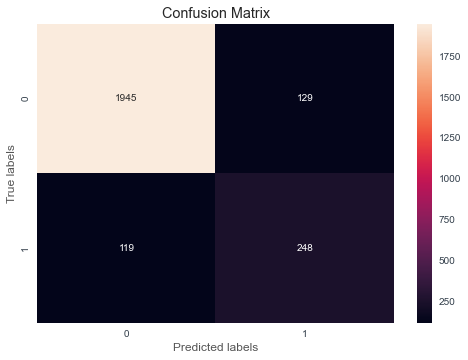

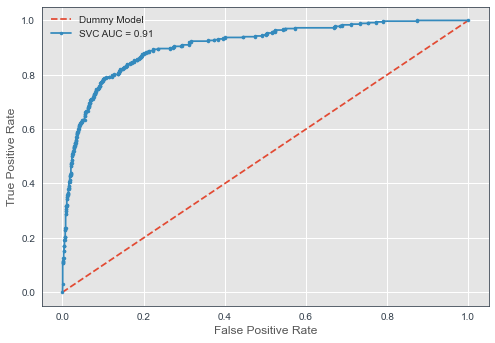

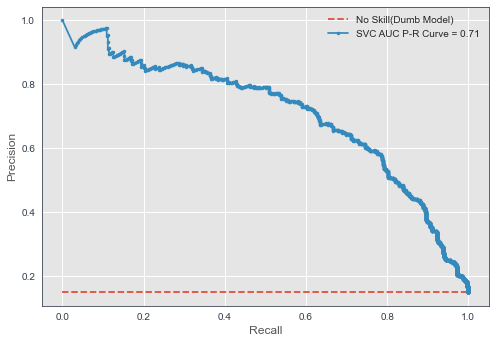

Feature Interpretation: 


Weight?,Feature
+4.709,<BIAS>
+1.746,PageValues
+0.181,ProductRelated
+0.095,ProductRelated_Duration
+0.029,Informational_Duration
-0.000,Administrative
-0.003,BounceRates
-0.009,TrafficType
-0.031,Browser
-0.043,Administrative_Duration


In [44]:

svm_model, svm_feature_imp, svm_model_acc =create_model(svm.SVC(kernel='linear', probability=True, random_state = 0), X_train_smote, X_test_final, y_train_smote, y_test, False)
svm_feature_imp

## 1.1 Tuning hyperparameters of SVM

In [52]:
# defining parameter range
svm_param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1]} 

optimized_svm = grid_search(svm_model,X_train_smote, X_test_final, y_train_smote, y_test, svm_param_grid, "roc_auc")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Results from Grid Search: 

The best estimator across all searched params for SVC:
 SVC(C=0.1, gamma=1, kernel='linear', probability=True, random_state=0)

The best roc_auc score across all searched params for SVC
: 0.9479458773211423

The best parameters across all searched params for SVC:
 {'C': 0.1, 'gamma': 1}



/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(




 F score on train set is: 0.8846080729991762
 F score on test set is: 0.6442432082794308

 Precision on train set is: 0.9256066834637316
 Precision on test set is: 0.6401028277634961

 Recall on train set is: 0.8470873786407767
 Recall on test set is: 0.6484375

 Train ROC is: 0.9523819693185032
 Test ROC is: 0.899956069721277

 Train accuracy is: 0.889502427184466
 Test accuracy is: 0.8873412535845965

 Train Classification report
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      8240
           1       0.93      0.85      0.88      8240

    accuracy                           0.89     16480
   macro avg       0.89      0.89      0.89     16480
weighted avg       0.89      0.89      0.89     16480


 Test Classification report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2057
           1       0.64      0.65      0.64       384

    accuracy                           0.8

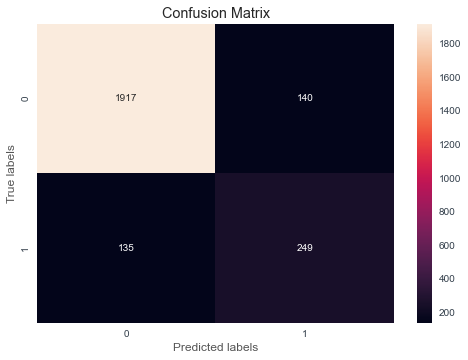

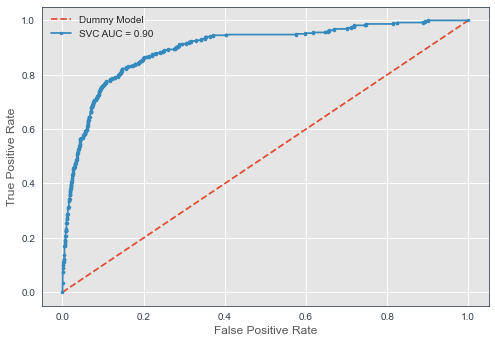

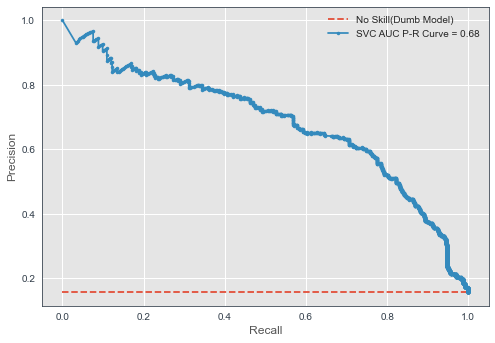

Feature Interpretation: 


Weight?,Feature
+3.594,<BIAS>
+1.660,PageValues
+0.166,ProductRelated
+0.090,ProductRelated_Duration
+0.022,Informational_Duration
-0.008,TrafficType
-0.009,Administrative
-0.022,Administrative_Duration
-0.022,BounceRates
-0.023,Browser


In [53]:
optimized_svm, svm_optimized_feature_imp, optimized_svm_acc = create_model(optimized_svm, X_train_smote, X_test_final, y_train_smote, y_test, False)
svm_optimized_feature_imp

### Predicting

In [54]:
# prediction for  the models

test_predictions = optimized_svm.predict(X_test_final)

In [55]:
test_predictions

array([0, 0, 0, ..., 0, 1, 0])

In [56]:
test_predictions.shape

(2441,)

## 2. KNN



 F score on train set is: 0.9173785971223021
 F score on test set is: 0.4583690987124463

 Precision on train set is: 0.8555404130411993
 Precision on test set is: 0.34765625

 Recall on train set is: 0.9888525384708591
 Recall on test set is: 0.672544080604534

 Train ROC is: 0.9912431007577533
 Test ROC is: 0.7887181010218518

 Train accuracy is: 0.910941475826972
 Test accuracy is: 0.7414993854977469

 Train Classification report
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      8253
           1       0.86      0.99      0.92      8253

    accuracy                           0.91     16506
   macro avg       0.92      0.91      0.91     16506
weighted avg       0.92      0.91      0.91     16506


 Test Classification report
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      2044
           1       0.35      0.67      0.46       397

    accuracy                           0.

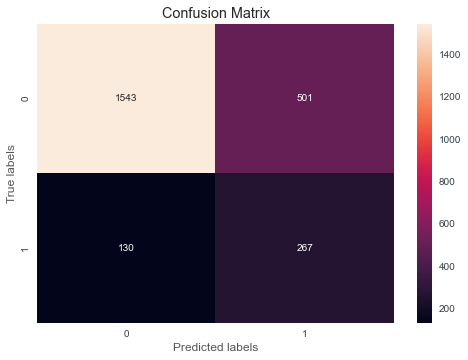

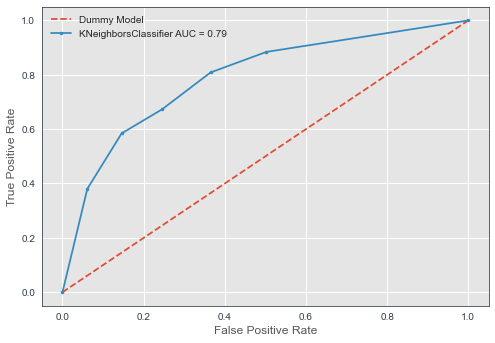

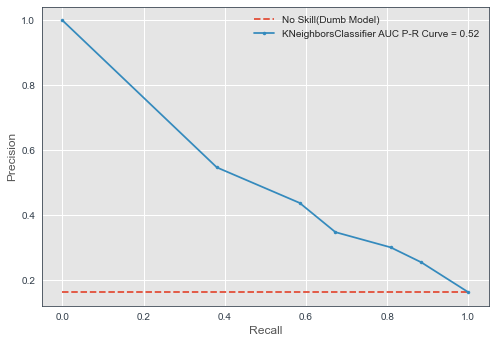

Feature Interpretation: 


In [43]:

KNN_model, KNN_feature_imp, KNN_model_acc =create_model(KNeighborsClassifier(), X_train_smote, X_test_final, y_train_smote, y_test, False)


## 2.1 Tuning hyperparameters of KNN

In [44]:

knn_param_grid = dict( n_neighbors=list(range(1,10)), p=[1,2])
optimized_knn = grid_search(KNN_model,X_train_smote, X_test_final, y_train_smote, y_test, knn_param_grid, "roc_auc")



Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.2min finished


Results from Grid Search: 

The best estimator across all searched params for KNeighborsClassifier:
 KNeighborsClassifier(n_neighbors=7, p=1)

The best roc_auc score across all searched params for KNeighborsClassifier
: 0.9610584774563847

The best parameters across all searched params for KNeighborsClassifier:
 {'n_neighbors': 7, 'p': 1}





 F score on train set is: 0.9178352199132737
 F score on test set is: 0.4872021182700794

 Precision on train set is: 0.8574284511784511
 Precision on test set is: 0.375

 Recall on train set is: 0.9873985217496668
 Recall on test set is: 0.6952141057934509

 Train ROC is: 0.9894486081008124
 Test ROC is: 0.8144098103683695

 Train accuracy is: 0.9116079001575185
 Test accuracy is: 0.7619827939369112

 Train Classification report
              precision    recall  f1-score   support

           0       0.99      0.84      0.90      8253
           1       0.86      0.99      0.92      8253

    accuracy                           0.91     16506
   macro avg       0.92      0.91      0.91     16506
weighted avg       0.92      0.91      0.91     16506


 Test Classification report
              precision    recall  f1-score   support

           0       0.93      0.77      0.85      2044
           1       0.38      0.70      0.49       397

    accuracy                           0.76 

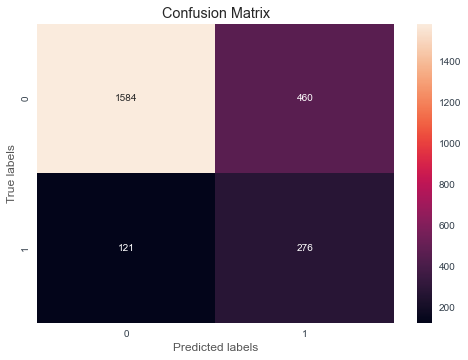

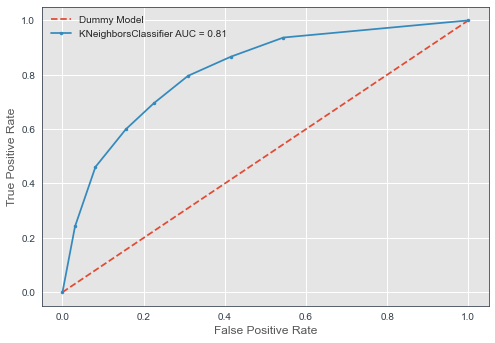

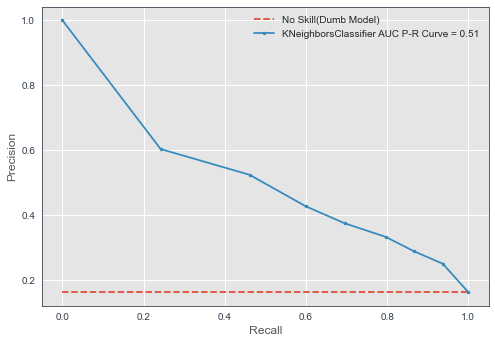

Feature Interpretation: 


In [45]:
optimized_knn, knn_optimized_feature_imp, optimized_knn_acc = create_model(optimized_knn, X_train_smote, X_test_final, y_train_smote, y_test, False)


## 3. Logistic Regresssion



 F score on train set is: 0.8777096631485812
 F score on test set is: 0.5932415519399249

 Precision on train set is: 0.9173051519154557
 Precision on test set is: 0.5895522388059702

 Recall on train set is: 0.8413910093299406
 Recall on test set is: 0.5969773299748111

 Train ROC is: 0.9540888744009886
 Test ROC is: 0.8727466763938936

 Train accuracy is: 0.8827699018538713
 Test accuracy is: 0.8668578451454322

 Train Classification report
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      8253
           1       0.92      0.84      0.88      8253

    accuracy                           0.88     16506
   macro avg       0.89      0.88      0.88     16506
weighted avg       0.89      0.88      0.88     16506


 Test Classification report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2044
           1       0.59      0.60      0.59       397

    accuracy                   

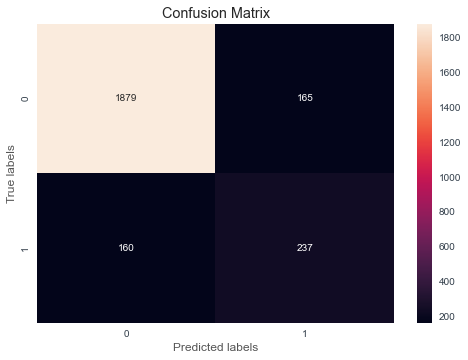

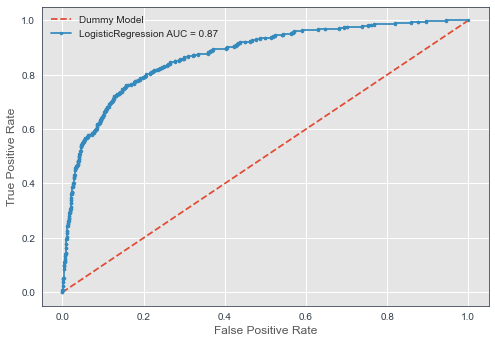

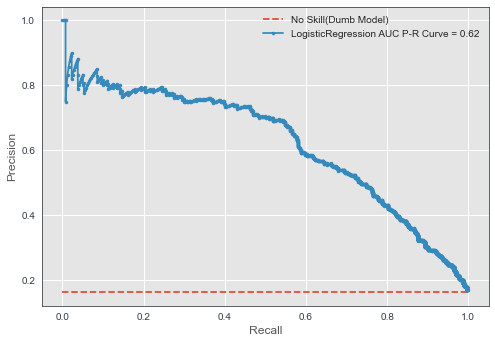

Feature Interpretation: 


Weight?,Feature
+7.930,<BIAS>
+2.058,PageValues
+0.148,ProductRelated
+0.144,ProductRelated_Duration
+0.051,Informational_Duration
-0.014,TrafficType
-0.014,Administrative
-0.039,Region
-0.058,Administrative_Duration
-0.062,Browser


In [46]:

log_model, log_feature_imp, log_acc = create_model(LogisticRegression(random_state = 0, max_iter = 1000), X_train_smote, X_test_final, y_train_smote, y_test, False)
log_feature_imp

> Page values and product related are the most important features according to this model.

## 3.1 Tuning Hyperparameters of logistic Regression

In [47]:

logistic_grid_values = {'C':[0.001,.009,0.01,.09,1,5,10,25]}
optimized_logistic = grid_search(log_model,X_train_smote, X_test_final, y_train_smote, y_test, logistic_grid_values, "roc_auc")



Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   27.2s finished


Results from Grid Search: 

The best estimator across all searched params for LogisticRegression:
 LogisticRegression(C=25, max_iter=1000, random_state=0)

The best roc_auc score across all searched params for LogisticRegression
: 0.9483400412309162

The best parameters across all searched params for LogisticRegression:
 {'C': 25}





 F score on train set is: 0.8776285786673423
 F score on test set is: 0.5869017632241813

 Precision on train set is: 0.919442601194426
 Precision on test set is: 0.5869017632241813

 Recall on train set is: 0.8394523203683509
 Recall on test set is: 0.5869017632241813

 Train ROC is: 0.955376268522633
 Test ROC is: 0.8699961058230268

 Train accuracy is: 0.8829516539440203
 Test accuracy is: 0.8656288406390823

 Train Classification report
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      8253
           1       0.92      0.84      0.88      8253

    accuracy                           0.88     16506
   macro avg       0.89      0.88      0.88     16506
weighted avg       0.89      0.88      0.88     16506


 Test Classification report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2044
           1       0.59      0.59      0.59       397

    accuracy                     

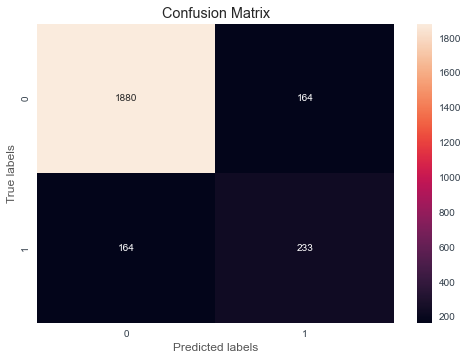

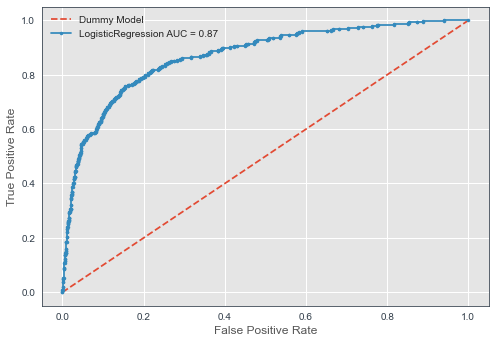

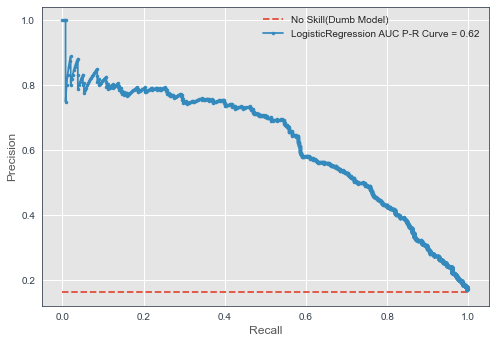

Feature Interpretation: 


Weight?,Feature
+13.582,<BIAS>
+2.072,PageValues
+0.149,ProductRelated
+0.147,ProductRelated_Duration
+0.051,Informational_Duration
-0.013,TrafficType
-0.015,Administrative
-0.040,Region
-0.063,Administrative_Duration
-0.066,Browser


In [48]:
optimized_logistic, optimized_logistic_feature_imp, optimized_logistic_acc = create_model(optimized_logistic, X_train_smote, X_test_final, y_train_smote, y_test)
optimized_logistic_feature_imp

> Roc has increased significantly after optimization. This model is more stable too as training and testing roc is closer. 

## 4. Decision Tree



 F score on train set is: 1.0
 F score on test set is: 0.5714285714285714

 Precision on train set is: 1.0
 Precision on test set is: 0.5377777777777778

 Recall on train set is: 1.0
 Recall on test set is: 0.6095717884130982

 Train ROC is: 1.0
 Test ROC is: 0.7539052679834571

 Train accuracy is: 1.0
 Test accuracy is: 0.8512904547316673

 Train Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8253
           1       1.00      1.00      1.00      8253

    accuracy                           1.00     16506
   macro avg       1.00      1.00      1.00     16506
weighted avg       1.00      1.00      1.00     16506


 Test Classification report
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2044
           1       0.54      0.61      0.57       397

    accuracy                           0.85      2441
   macro avg       0.73      0.75      0.74      244

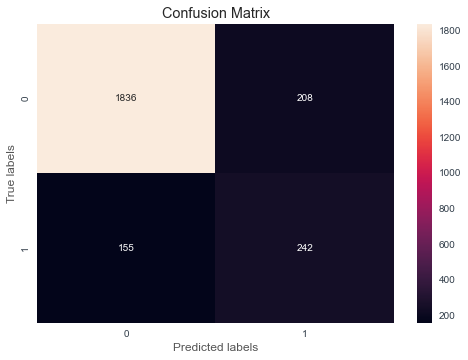

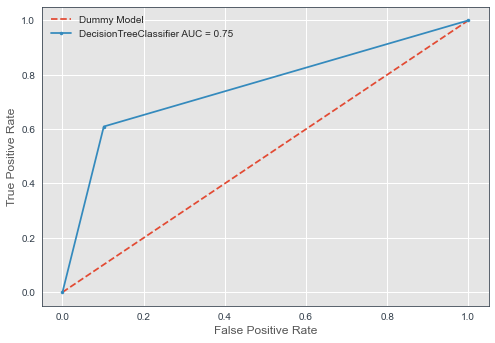

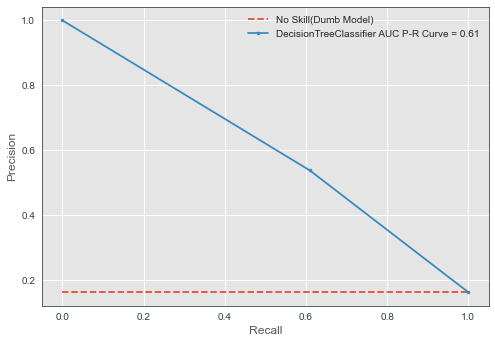

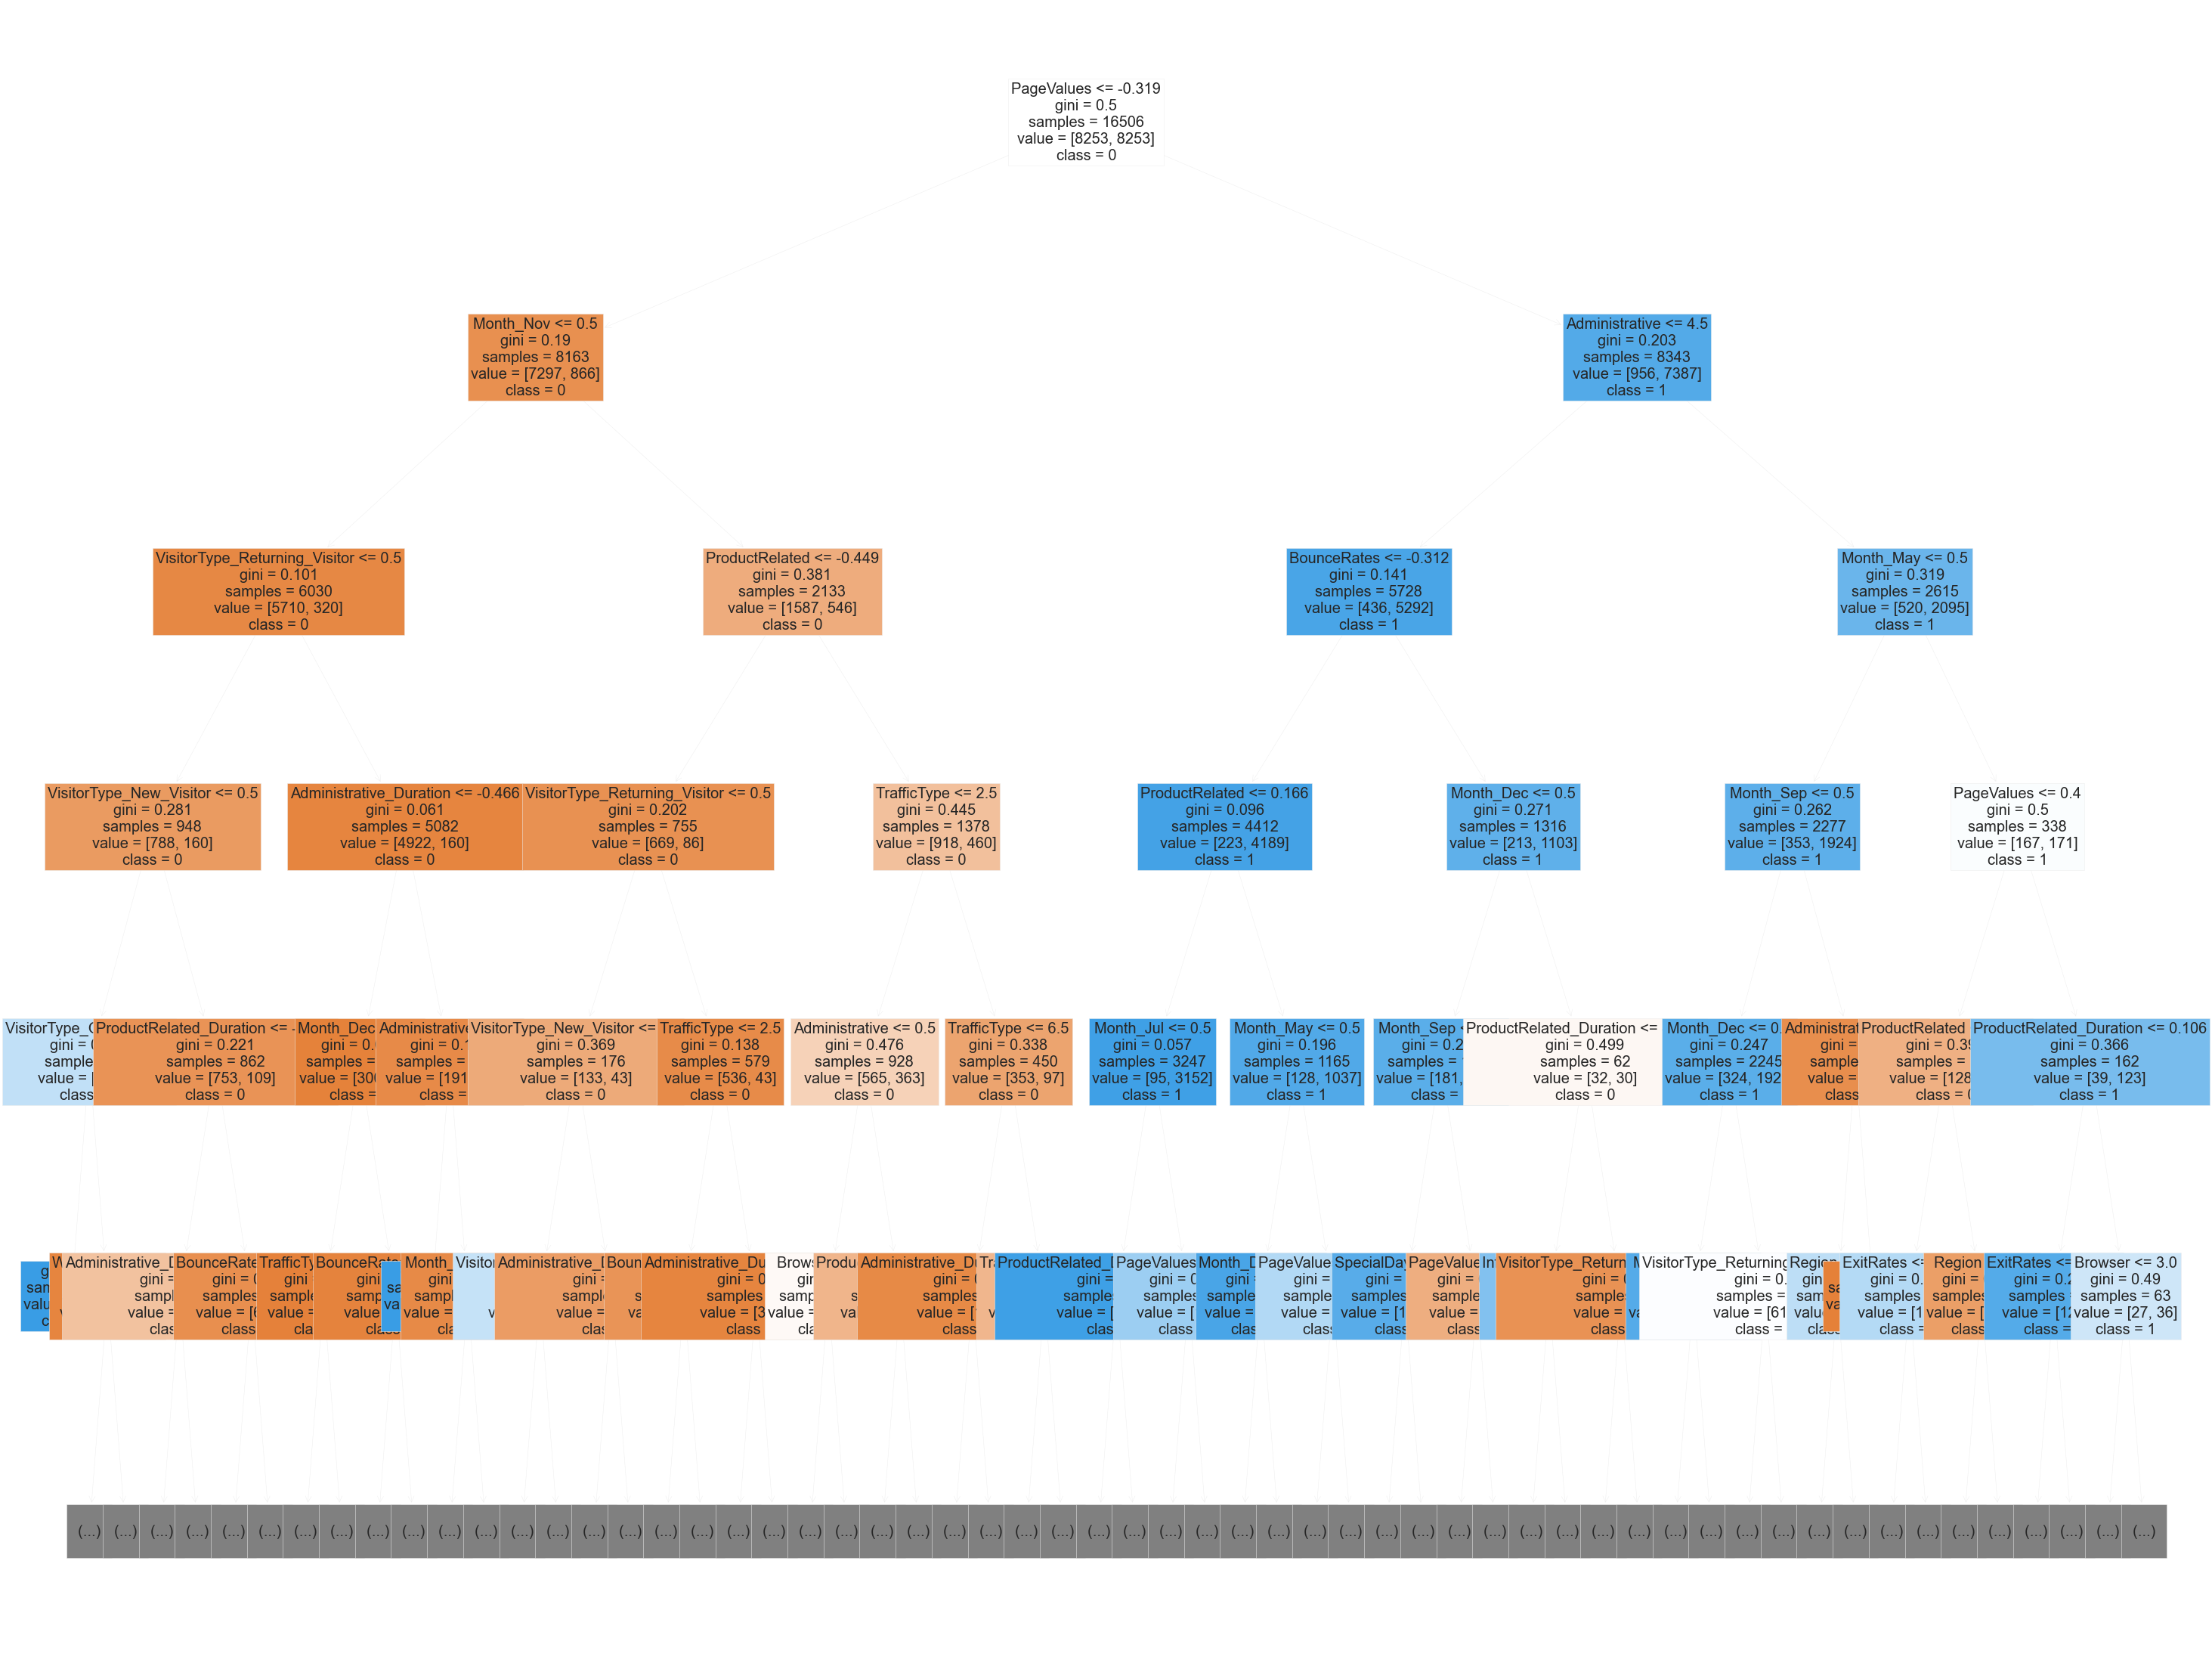

Feature Interpretation: 


Weight,Feature
0.6279,PageValues
0.0355,ExitRates
0.0351,ProductRelated
0.0328,ProductRelated_Duration
0.0268,Administrative
0.0261,BounceRates
0.0255,Administrative_Duration
0.0198,Region
0.0187,Month_Nov
0.0183,TrafficType


In [49]:
dtree, dtree_imp, dtree_acc = create_model(DecisionTreeClassifier(random_state = 0), X_train_smote, X_test_final, y_train_smote, y_test, True)
dtree_imp

> Rules can be observed here, on which splitting is being done.

> Page value and exit rates are  most important features here according to this model.

## 4.1 Tuning hyperparameters of decision tree

In [50]:
dtree_param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15), 'min_samples_leaf': [4, 5,6,7,8,9,12]}
optimized_dtree = grid_search(dtree,X_train_smote, X_test_final, y_train_smote, y_test, dtree_param_grid, "roc_auc")



Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Results from Grid Search: 

The best estimator across all searched params for DecisionTreeClassifier:
 DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=12,
                       random_state=0)

The best roc_auc score across all searched params for DecisionTreeClassifier
: 0.9575973827120686

The best parameters across all searched params for DecisionTreeClassifier:
 {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 12}



[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:  1.4min finished




 F score on train set is: 0.9359947409310942
 F score on test set is: 0.6447963800904977

 Precision on train set is: 0.9234669811320755
 Precision on test set is: 0.5852156057494866

 Recall on train set is: 0.948867078638071
 Recall on test set is: 0.7178841309823678

 Train ROC is: 0.9864491223566758
 Test ROC is: 0.8685062134304742

 Train accuracy is: 0.9351145038167938
 Test accuracy is: 0.8713641950020483

 Train Classification report
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      8253
           1       0.92      0.95      0.94      8253

    accuracy                           0.94     16506
   macro avg       0.94      0.94      0.94     16506
weighted avg       0.94      0.94      0.94     16506


 Test Classification report
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2044
           1       0.59      0.72      0.64       397

    accuracy                    

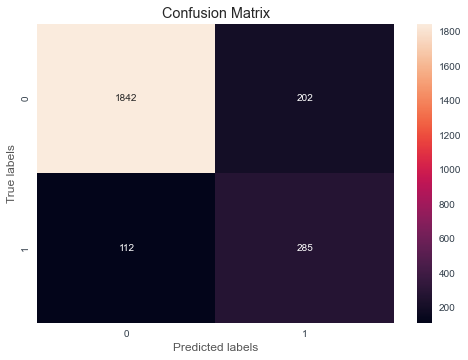

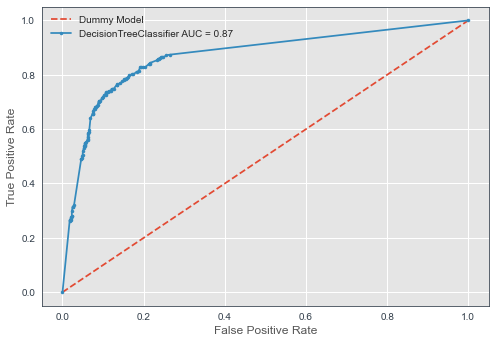

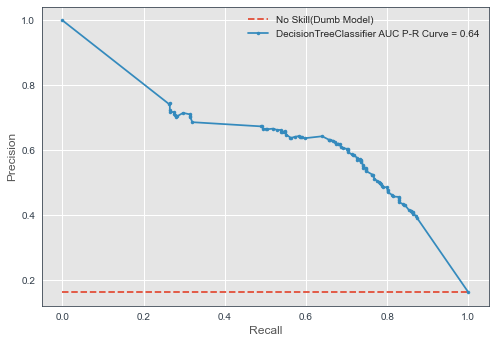

Feature Interpretation: 


Weight,Feature
0.6441,PageValues
0.0419,Month_Nov
0.0299,ProductRelated
0.0277,Month_May
0.0255,Administrative
0.0238,VisitorType_Returning_Visitor
0.0224,Administrative_Duration
0.0201,ExitRates
0.0187,Month_June
0.0186,Month_Mar


In [51]:
optimized_dtree, dtree_optimized_feature_imp, optimized_dtree_acc = create_model(optimized_dtree, X_train_smote, X_test_final, y_train_smote, y_test, False)
dtree_optimized_feature_imp

> The ROC results here look far better than the non optimzed decision tree. Overfitting has reduced here. 

## 5. XGBoost



 F score on train set is: 0.982252104912472
 F score on test set is: 0.6483790523690773

 Precision on train set is: 0.9820736434108527
 Precision on test set is: 0.6419753086419753

 Recall on train set is: 0.9824306312855932
 Recall on test set is: 0.654911838790932

 Train ROC is: 0.9987832835763221
 Test ROC is: 0.9102663321289317

 Train accuracy is: 0.9822488791954441
 Test accuracy is: 0.8844735764031135

 Train Classification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8253
           1       0.98      0.98      0.98      8253

    accuracy                           0.98     16506
   macro avg       0.98      0.98      0.98     16506
weighted avg       0.98      0.98      0.98     16506


 Test Classification report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2044
           1       0.64      0.65      0.65       397

    accuracy                     

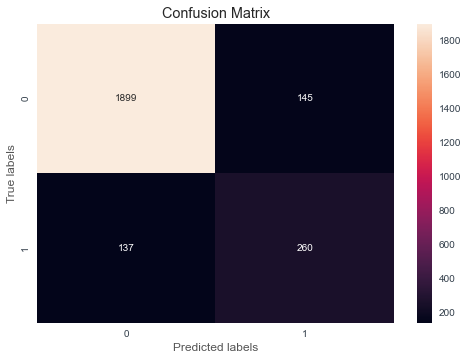

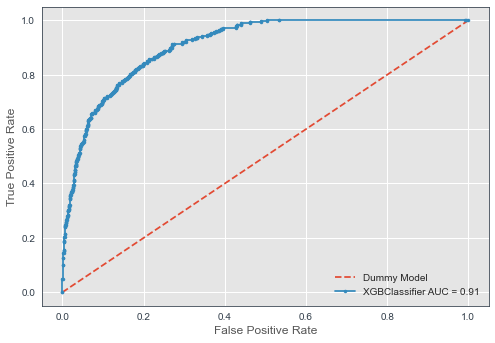

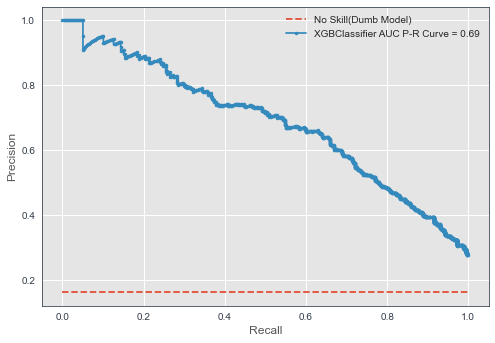

Feature Interpretation: 


Weight,Feature
0.2491,PageValues
0.0815,Month_May
0.0563,Month_Nov
0.0554,VisitorType_Returning_Visitor
0.0535,Month_Mar
0.0534,VisitorType_Other
0.0505,Month_Dec
0.0471,Month_Sep
0.0407,VisitorType_New_Visitor
0.0392,Month_Oct


In [52]:
xgb_model, feature_imp_xgb, xgb_model_acc = create_model(XGBClassifier(use_label_encoder=False , random_state = 0, eval_metric = "logloss"), X_train_smote, X_test_final, y_train_smote, y_test, False )
feature_imp_xgb

## 5.1 Tuning hyperparameters of XGBoost tree

In [53]:
xgb_parameter_grid = {'max_depth': range (2, 8, 1), 'n_estimators': range(50, 201, 50), 'learning_rate': [0.1, 0.01, 0.05]}
optimized_xgb= grid_search(xgb_model,X_train_smote, X_test_final, y_train_smote, y_test, xgb_parameter_grid, "roc_auc")



Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  9.3min finished


Results from Grid Search: 

The best estimator across all searched params for XGBClassifier:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

The best roc_auc score across all searched params for XGBClassifier
: 0.9813166655388358

The best parameters across all searched params for XGBClassifier:
 {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}





 F score on train set is: 0.9804063860667634
 F score on test set is: 0.6511056511056512

 Precision on train set is: 0.9786309308221659
 Precision on test set is: 0.6354916067146283

 Recall on train set is: 0.9821882951653944
 Recall on test set is: 0.6675062972292192

 Train ROC is: 0.9983126837442131
 Test ROC is: 0.9175974899811207

 Train accuracy is: 0.9803707742639041
 Test accuracy is: 0.8836542400655469

 Train Classification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8253
           1       0.98      0.98      0.98      8253

    accuracy                           0.98     16506
   macro avg       0.98      0.98      0.98     16506
weighted avg       0.98      0.98      0.98     16506


 Test Classification report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2044
           1       0.64      0.67      0.65       397

    accuracy                   

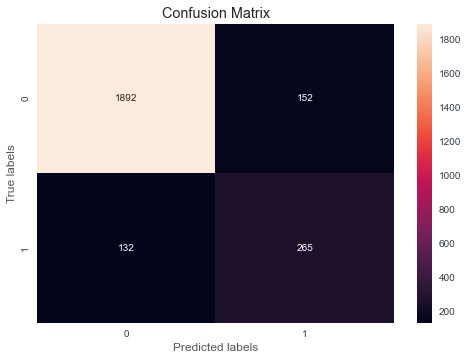

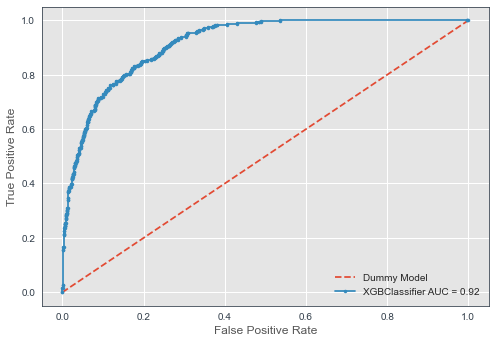

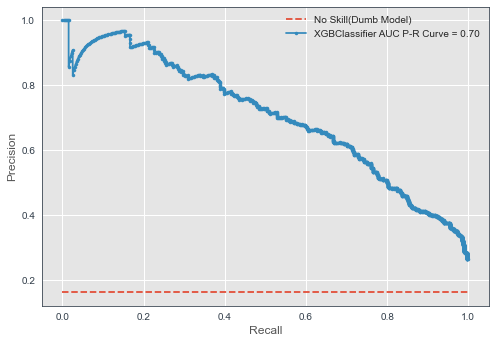

Feature Interpretation: 


Weight,Feature
0.2641,PageValues
0.0768,Month_May
0.0611,Month_Nov
0.0557,VisitorType_Returning_Visitor
0.0523,Month_Mar
0.0504,VisitorType_Other
0.0498,Month_Dec
0.0422,Month_Oct
0.0380,VisitorType_New_Visitor
0.0374,Month_Aug


In [54]:
optimized_xgb, optimized_xgb_feature_imp,optimized_xgb_acc  = create_model(optimized_xgb, X_train_smote, X_test_final, y_train_smote, y_test, False)
optimized_xgb_feature_imp

> Test ROC has increased.

### Accuracies For All Models

In [5]:
model_name = ("SVM", "KNN", "Logistic", "Decision Tree", "XGBoost")
train_acc = (optimized_svm_acc[0], optimized_knn_acc[0], optimized_logistic_acc[0], optimized_dtree_acc[0], optimized_xgb_acc[0])
test_acc = (optimized_svm_acc[1], optimized_knn_acc[1], optimized_logistic_acc[1], optimized_dtree_acc[1], optimized_xgb_acc[1])

NameError: name 'optimized_svm_acc' is not defined

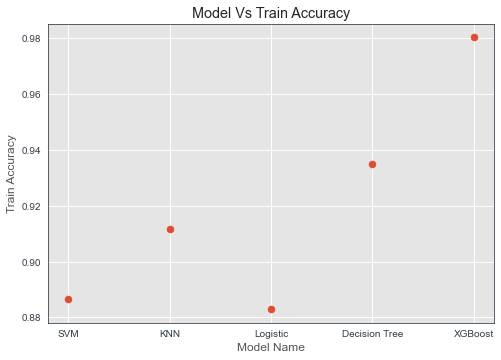

In [86]:
plt.scatter(x = model_name, y = train_acc); 
plt.title("Model Vs Train Accuracy");
plt.xlabel("Model Name");
plt.ylabel("Train Accuracy");

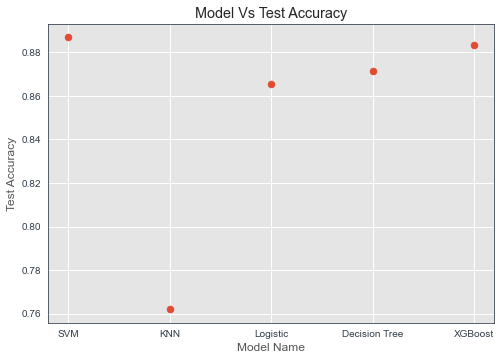

In [85]:
plt.scatter(x = model_name, y = test_acc); 
plt.title("Model Vs Test Accuracy");
plt.xlabel("Model Name");
plt.ylabel("Test Accuracy");

In [4]:
plt.scatter(x = model_name, y = test_acc);
plt.scatter(x = model_name, y = train_acc); 


plt.title("Model Vs Test Accuracy");
plt.xlabel("Model Name");
plt.ylabel("Test Accuracy");

NameError: name 'model_name' is not defined

## --Clustering--

In [55]:
# This woud tell the optimal clusters that are required
wcss, cluster_no = [], []

for number_of_clusters in range(2, 20):
    kmeans = KMeans(n_clusters = number_of_clusters, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train_final)
    wcss.append(kmeans.inertia_)
    cluster_no.append(number_of_clusters)
    

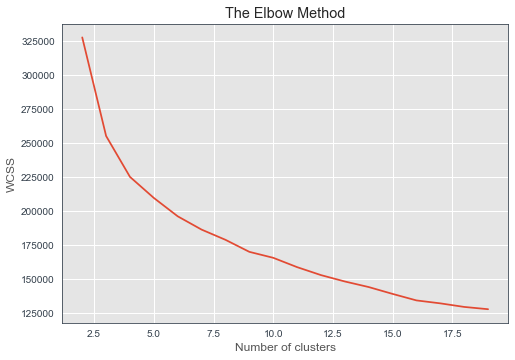

In [56]:
plt.plot(cluster_no, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

> Optimal Clusters = 6

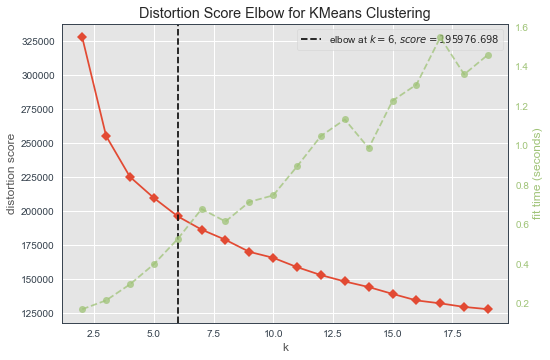

In [57]:
# Lets visualize the same using elbow visualizer gives a better picture to be honest
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 42)
elb_visualizer = KElbowVisualizer(kmeans, k=(2,20));
elb_visualizer.fit(X_train_final);
elb_visualizer.show();

In [58]:
# Craeting the model with k = 6
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

# Predicting the cluster
kmeans.fit(X_train_final)



KMeans(n_clusters=2, random_state=42)

> The optimal clusters are 6 but since target variable had 2 classes lets go with that.

Cluster Visualization For Training Data


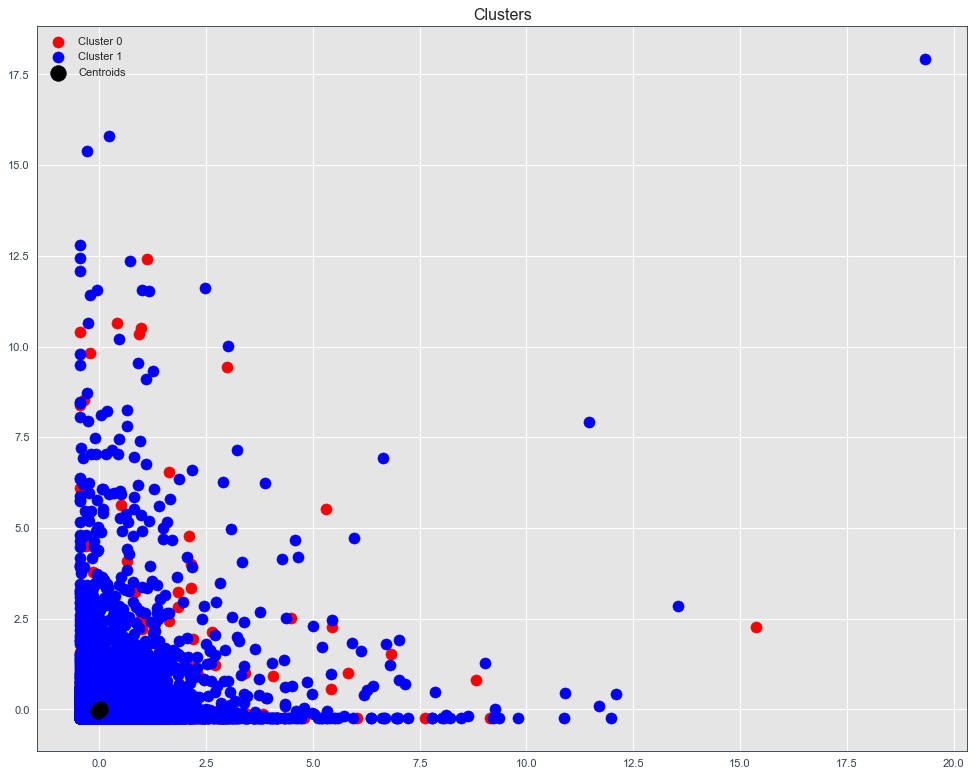

In [59]:
print("Cluster Visualization For Training Data")
plot_the_clusters(kmeans, X_train_final, 2)

Cluster Visualization For Testing Data


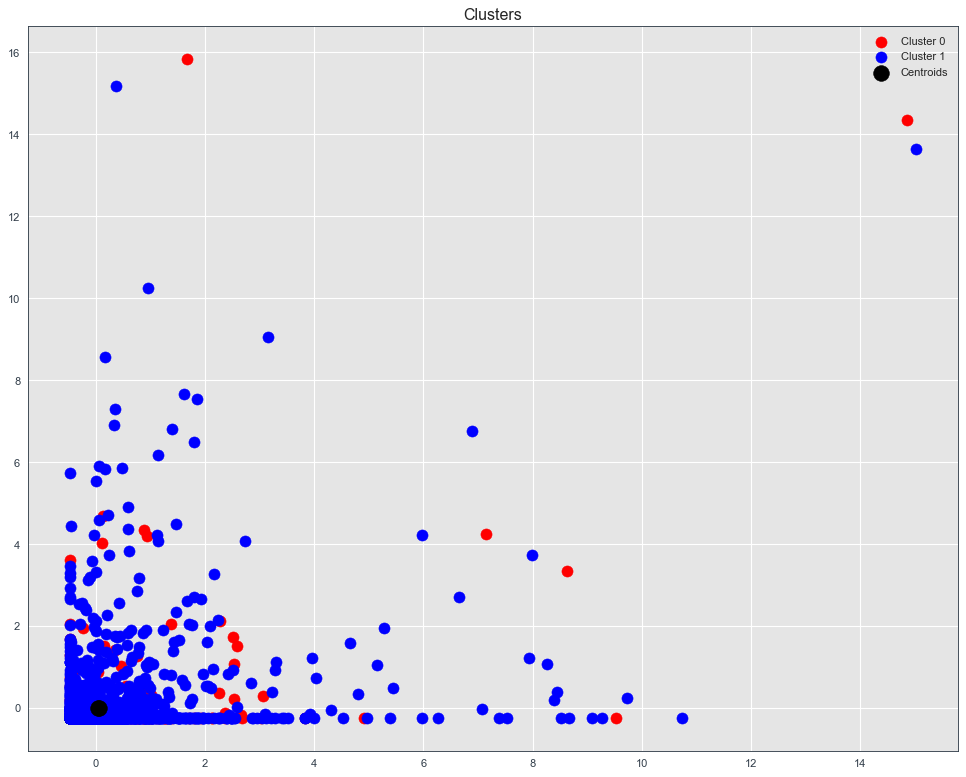

In [60]:
print("Cluster Visualization For Testing Data")
plot_the_clusters(kmeans, X_test_final, 2)

In [61]:
# Gives you the cordinates of cluster centers
centers = kmeans.cluster_centers_


In [62]:
print("For training data, n_clusters = {}, silhouette score is {})".format(2, silhouette_score(X_train_final, kmeans.predict(X_train_final))))
print("For testing data, n_clusters = {}, silhouette score is {})".format(2, silhouette_score(X_test_final, kmeans.predict(X_test_final))))


For training data, n_clusters = 2, silhouette score is 0.3986888845683149)
For testing data, n_clusters = 2, silhouette score is 0.3957345819379844)


**Observation**

> This is not working great. Cluster centers are on top of each other, huge overlap between clusters which suggests it is not able to get the trend in data

## PCA + Clustering


In [63]:
# Checking how mich variance is explained by the number of components
for pc in range(2, (X_train_final.shape[1])):
    pca = PCA(n_components=pc)
    pca.fit_transform(X_train_final)
    print(f"For pc components = {pc}, the variance is: {round(pca.explained_variance_ratio_.sum(),5)  }")


For pc components = 2, the variance is: 0.61445
For pc components = 3, the variance is: 0.73948
For pc components = 4, the variance is: 0.80158
For pc components = 5, the variance is: 0.84629
For pc components = 6, the variance is: 0.88356
For pc components = 7, the variance is: 0.90867
For pc components = 8, the variance is: 0.92913
For pc components = 9, the variance is: 0.94531
For pc components = 10, the variance is: 0.9584
For pc components = 11, the variance is: 0.96856
For pc components = 12, the variance is: 0.9744
For pc components = 13, the variance is: 0.97909
For pc components = 14, the variance is: 0.98313
For pc components = 15, the variance is: 0.9869
For pc components = 16, the variance is: 0.98992
For pc components = 17, the variance is: 0.99271
For pc components = 18, the variance is: 0.99453
For pc components = 19, the variance is: 0.99592
For pc components = 20, the variance is: 0.9968
For pc components = 21, the variance is: 0.99756
For pc components = 22, the vari

> 4 components look good to me. They explain 80% variance.

In [64]:
pca = PCA(n_components = 4)
X_train_final_pca = pca.fit_transform(X_train_final)
X_test_final_pca = pca.transform(X_test_final)
    

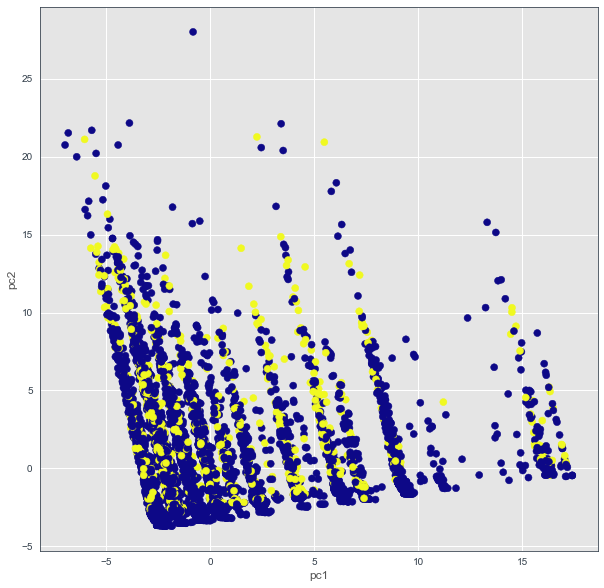

In [65]:
# PLotting PC1 Vs PC2  (We have 4 components but plotting them at once is not possible)
plt.figure(figsize=(10,10))
plt.scatter(X_train_final_pca[:,0],X_train_final_pca[:,1],c= y_train,cmap='plasma');
plt.xlabel('pc1');
plt.ylabel('pc2');

### Clustering

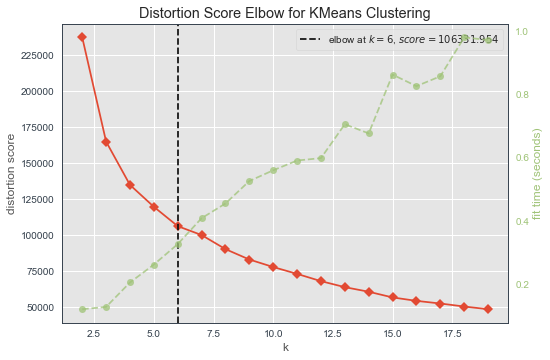

In [66]:
# Lets visualize the same using elbow visualizer gives a better picture to be honest
# This timee we do it for pca data
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 42)
elb_visualizer = KElbowVisualizer(kmeans, k=(2,20));
elb_visualizer.fit(X_train_final_pca)    ;
elb_visualizer.show();

In [67]:
# Craeting the model with k = 6
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

# Predicting the cluster
kmeans.fit(X_train_final_pca)



KMeans(n_clusters=2, random_state=42)

Cluster Visualization For Training Data


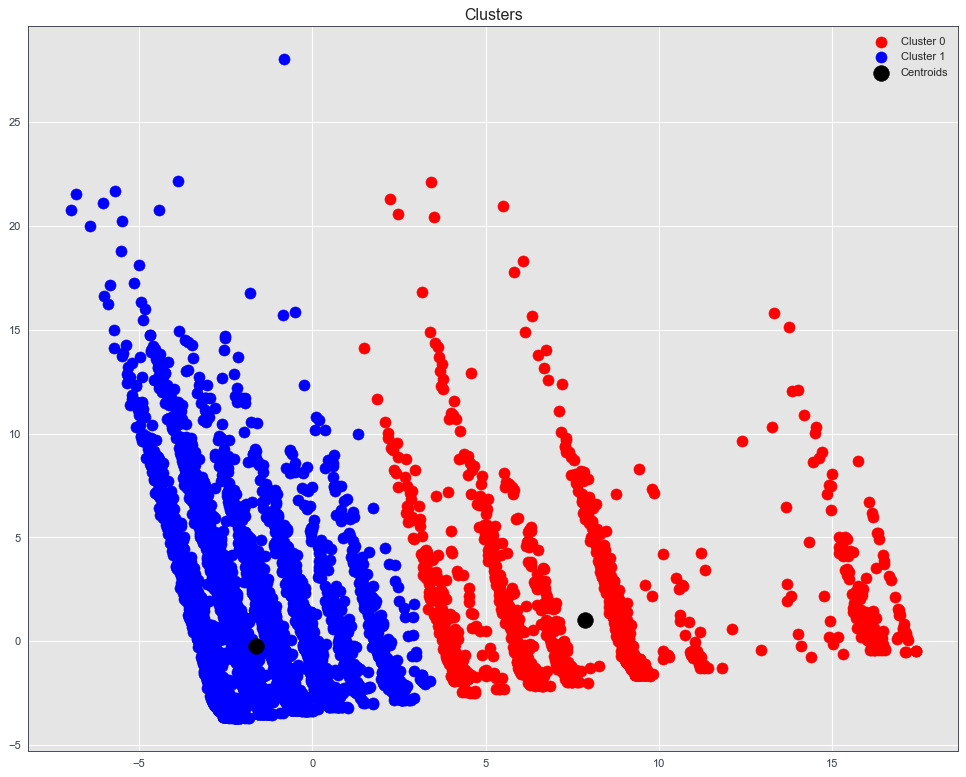

In [68]:
print("Cluster Visualization For Training Data")
plot_the_clusters(kmeans, X_train_final_pca, 2)

> This looks far better (Centroids are well defined now, overlapping is very less )

> The clusters are clean. The centroids and the clusters do not overlap.

Cluster Visualization For Testing Data


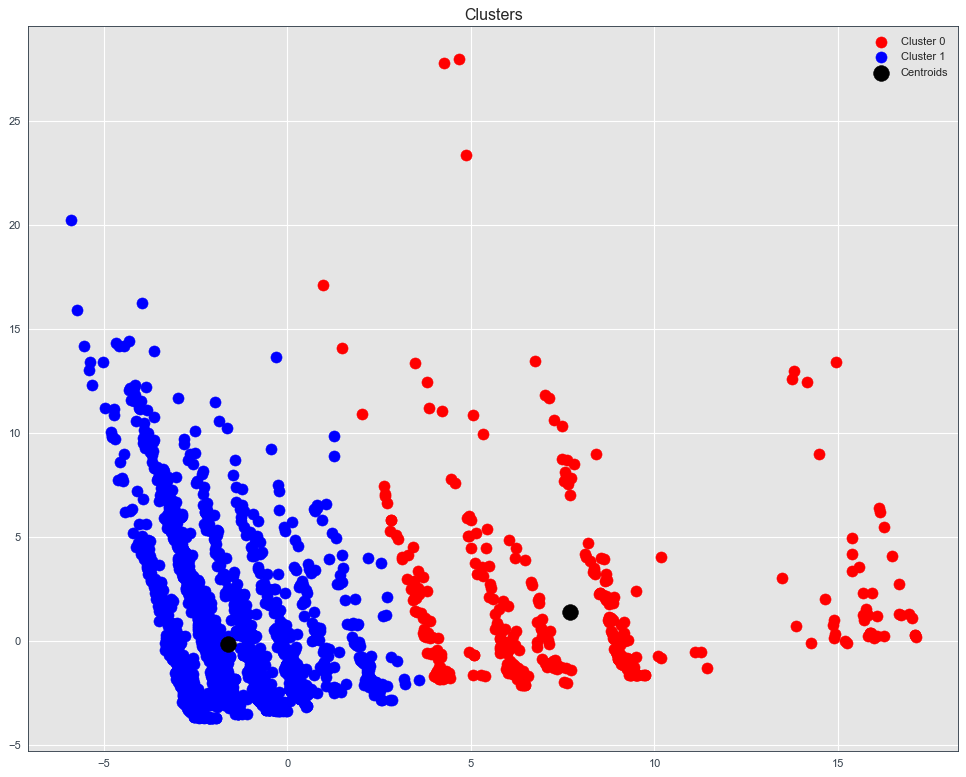

In [69]:
print("Cluster Visualization For Testing Data")
plot_the_clusters(kmeans, X_test_final_pca, 2)

In [70]:
print("For training data, n_clusters = {}, silhouette score is {})".format(2, silhouette_score(X_train_final_pca, kmeans.predict(X_train_final_pca))))
print("For testing data, n_clusters = {}, silhouette score is {})".format(2, silhouette_score(X_test_final_pca, kmeans.predict(X_test_final_pca))))


For training data, n_clusters = 2, silhouette score is 0.4732336282356762)
For testing data, n_clusters = 2, silhouette score is 0.4685545973751635)


> Also the silhouette score has improved.

## Conclusion

> The data has imbalance which is dealt with SMOTE.

> XGBoost classifier looks to be the most stable model on the basis of ROC- AUC.

> Clustering on the data is not generating good results, huge overlaps can be seen. But when we move on to PCA, and then we cluster the data. The clusters looks pretty defined.